
# 🧠 Milestone 2: Advanced Data Analysis & Model Selection

This notebook covers:
- RGB band analysis by land type
- PCA (Principal Component Analysis) visualization
- Simple CNN model definition
- Data splitting and DataLoader setup


In [2]:

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from sklearn.decomposition import PCA
import torch.nn as nn
import torch.nn.functional as F
from collections import Counter


In [3]:

# Set dataset path (edit this to your local path)
data_dir = r'C:\users\a\downloads\EuroSAT'

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

dataset = ImageFolder(root=data_dir, transform=transform)
class_names = dataset.classes
print("Classes:", class_names)


Classes: ['2750']


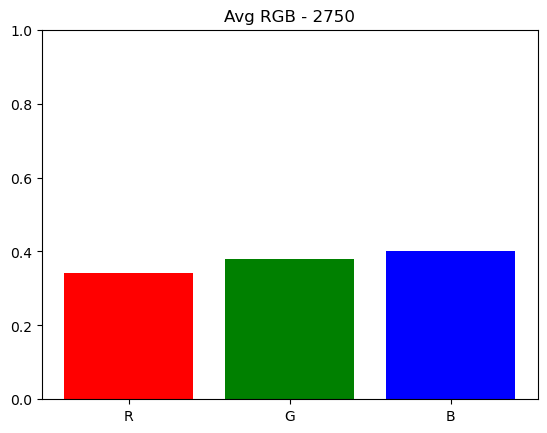

In [4]:

# Average RGB by class (sampled for speed)
class_rgb = {name: [] for name in class_names}

for i in range(0, len(dataset), 200):
    img, label = dataset[i]
    img = img * 0.5 + 0.5  # unnormalize
    r, g, b = img[0].mean().item(), img[1].mean().item(), img[2].mean().item()
    class_rgb[class_names[label]].append([r, g, b])

for cls in class_rgb:
    rgb_values = np.array(class_rgb[cls])
    mean_rgb = rgb_values.mean(axis=0)
    plt.bar(['R', 'G', 'B'], mean_rgb, color=['red', 'green', 'blue'])
    plt.title(f'Avg RGB - {cls}')
    plt.ylim(0, 1)
    plt.show()


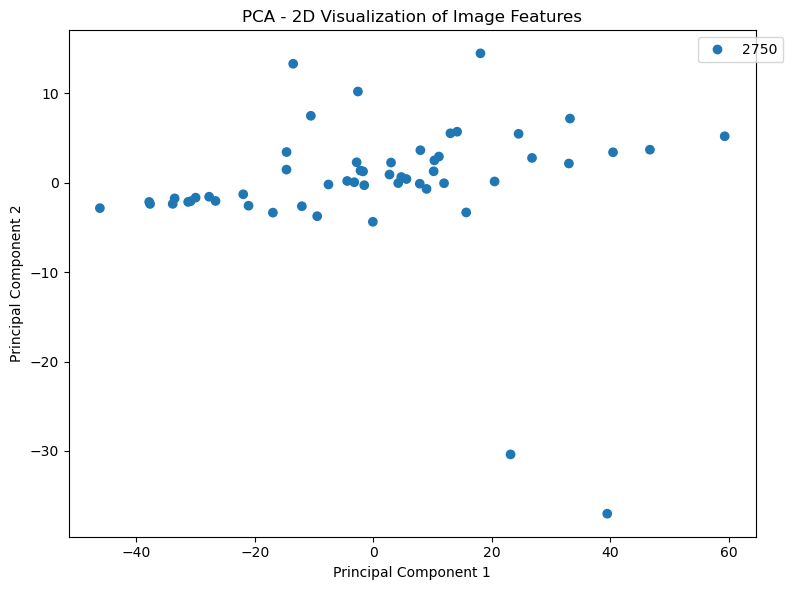

In [5]:

# PCA 2D scatter plot
flat_images = []
labels = []

for i in range(0, len(dataset), 500):
    img, label = dataset[i]
    flat_images.append(img.view(-1).numpy())
    labels.append(label)

pca = PCA(n_components=2)
reduced = pca.fit_transform(flat_images)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='tab10')
plt.legend(handles=scatter.legend_elements()[0], labels=class_names, bbox_to_anchor=(1.05, 1))
plt.title("PCA - 2D Visualization of Image Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()


In [6]:

# Simple CNN definition
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 16 * 16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [7]:

# Data split and loaders
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

print("Data loaders ready.")


Data loaders ready.
